In [89]:
!pip install pycrypto


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
import itertools
import time
from Crypto.Cipher import DES

In [91]:
def hd(str1, str2):
    str1=hex2bin(str1)
    str2=hex2bin(str2)
    distance = 0
    for ch1, ch2 in zip(str1, str2):
        if ch1 != ch2:
            distance += 1
    return distance
import random
def xorN(s,n):
    s=hex2bin(s)
    indices=random.choices(list(range(64)),k=n)
    ls=list(s)
    #print(ls)
    #print()
    #print(indices)
    for i in indices:
        if ls[i]=='0':
            ls[i]='1'
        else:
            ls[i]='0'
    ans= "".join(ls)
    return bin2hex(ans)
        
def hex2bin(s):
    mp = {'0': "0000",
        '1': "0001",
        '2': "0010",
        '3': "0011",
        '4': "0100",
        '5': "0101",
        '6': "0110",
        '7': "0111",
        '8': "1000",
        '9': "1001",
        'A': "1010",
        'B': "1011",
        'C': "1100",
        'D': "1101",
        'E': "1110",
        'F': "1111"}
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin
def bin2hex(s):
    mp = {"0000": '0',
        "0001": '1',
        "0010": '2',
        "0011": '3',
        "0100": '4',
        "0101": '5',
        "0110": '6',
        "0111": '7',
        "1000": '8',
        "1001": '9',
        "1010": 'A',
        "1011": 'B',
        "1100": 'C',
        "1101": 'D',
        "1110": 'E',
        "1111": 'F'}
    hex = ""
    for i in range(0, len(s), 4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]

    return hex

# Binary to decimal conversion


def bin2dec(binary):

    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

# Decimal to binary conversion


def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res) % 4 != 0):
        div = len(res) / 4
        div = int(div)
        counter = (4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res

# Permute function to rearrange the bits


def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation

# shifting the bits towards left by nth shifts


def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1, len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
    return k

# calculating xow of two strings of binary number a and b


def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans


# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
        6, 7, 8, 9, 8, 9, 10, 11,
        12, 13, 12, 13, 14, 15, 16, 17,
        16, 17, 18, 19, 20, 21, 20, 21,
        22, 23, 24, 25, 24, 25, 26, 27,
        28, 29, 28, 29, 30, 31, 32, 1]

# Straight Permutation Table
per = [16, 7, 20, 21,
    29, 12, 28, 17,
    1, 15, 23, 26,
    5, 18, 31, 10,
    2, 8, 24, 14,
    32, 27, 3, 9,
    19, 13, 30, 6,
    22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
        [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

        [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

        [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
        [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
        [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
        [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

        [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

        [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
        [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
        [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

        [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

        [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
        [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
        [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
        [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
            39, 7, 47, 15, 55, 23, 63, 31,
            38, 6, 46, 14, 54, 22, 62, 30,
            37, 5, 45, 13, 53, 21, 61, 29,
            36, 4, 44, 12, 52, 20, 60, 28,
            35, 3, 43, 11, 51, 19, 59, 27,
            34, 2, 42, 10, 50, 18, 58, 26,
            33, 1, 41, 9, 49, 17, 57, 25]
def encrypt(pt, rkb, rk,myList):
    pt = hex2bin(pt)

    # Initial Permutation
    pt = permute(pt, initial_perm, 64)
   # print("After initial permutation", bin2hex(pt))

    # Splitting
    left = pt[0:32]
    right = pt[32:64]
    for i in range(0, 16):
        # Expansion D-box: Expanding the 32 bits data into 48 bits
        right_expanded = permute(right, exp_d, 48)

        # XOR RoundKey[i] and right_expanded
        xor_x = xor(right_expanded, rkb[i])

        # S-boxex: substituting the value from s-box table by calculating row and column
        sbox_str = ""
        for j in range(0, 8):
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(
                int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)

        # Straight D-box: After substituting rearranging the bits
        sbox_str = permute(sbox_str, per, 32)

        # XOR left and sbox_str
        result = xor(left, sbox_str)
        left = result
        
        # Swapper
        val1=bin2hex(left)
        val2=bin2hex(right)
        myList.append(val1+val2)
        if(i != 15):
            left, right = right, left

    # Combination
    combine = left + right

    # Final permutation: final rearranging of bits to get cipher text
    cipher_text = permute(combine, final_perm, 64)
    return cipher_text
def getList(pt,key):
    myList=[]
    # Key generation
    # --hex to binary
    key = hex2bin(key)

    # --parity bit drop table
    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4]

    # getting 56 bit key from 64 bit using the parity bits
    key = permute(key, keyp, 56)

    # Number of bit shifts
    shift_table = [1, 1, 2, 2,
                2, 2, 2, 2,
                1, 2, 2, 2,
                2, 2, 2, 1]

    # Key- Compression Table : Compression of key from 56 bits to 48 bits
    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32]

    # Splitting
    left = key[0:28] # rkb for RoundKeys in binary
    right = key[28:56] # rk for RoundKeys in hexadecimal

    rkb = []
    rk = []
    for i in range(0, 16):
        # Shifting the bits by nth shifts by checking from shift table
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])

        # Combination of left and right string
        combine_str = left + right

        # Compression of key from 56 to 48 bits
        round_key = permute(combine_str, key_comp, 48)

        rkb.append(round_key)
        rk.append(bin2hex(round_key))

    #print("Encryption")
    cipher_text = bin2hex(encrypt(pt, rkb, rk,myList))
    print("Cipher Text : ", cipher_text)
    
    return myList

### **1.CHANGING PLAINTEXTS i.e USING 5 DIFFERENT PLAINTEXTS**

In [92]:
pt =  "3F5A2F0F0AC0B257"
key = "D3E5B2B0A0C0F57A"
xorPtList=[]
for _ in range(5):
    xorPtList.append(xorN(pt,1))

In [93]:
xorPtList

['3F5A2F0F0AC0B255',
 '3F5A2F8F0AC0B257',
 '3F5A2F0F2AC0B257',
 '3F5E2F0F0AC0B257',
 '3F5A2F0F0AC0B247']

In [94]:
cList=getList(pt,key) 
cList

Cipher Text :  553C44788CCEB777


['D4841CCB60451FDF',
 '1F3C209CD4841CCB',
 '9B9213B41F3C209C',
 '096A3AA89B9213B4',
 '784BD021096A3AA8',
 '5209B264784BD021',
 '623487F95209B264',
 '2CB40EF5623487F9',
 '21FEF9B82CB40EF5',
 'D46E9D6D21FEF9B8',
 '2B046C12D46E9D6D',
 '2283AA182B046C12',
 'E63F162A2283AA18',
 '3A3ED1F6E63F162A',
 '70CA3AE03A3ED1F6',
 'ADCBF7C170CA3AE0']

In [95]:
x1cL=[]
for i in range(5):
    x1cL.append(getList(xorPtList[i],key))

Cipher Text :  A2B58858B715C6CF
Cipher Text :  1DA35F081354415C
Cipher Text :  28A285295D98D6E4
Cipher Text :  2CEC91DA603AF184
Cipher Text :  893C2A0AE494ADD6


In [96]:
for i in x1cL:
    print(i)
    print()

['D4B43CCA60451F5F', '9A7BB81AD4B43CCA', '5720F4AC9A7BB81A', '6337AF345720F4AC', 'D5FFB2096337AF34', 'C92E9C4FD5FFB209', '1A9A6191C92E9C4F', '733C26A71A9A6191', '7DA9ED26733C26A7', '637BA6917DA9ED26', '770AC3BE637BA691', '78403A26770AC3BE', '0C7ED0F378403A26', '80DC12130C7ED0F3', 'D7138CD180DC1213', 'C83AF2B2D7138CD1']

['940CDCCB68451FDF', 'D3F9E38A940CDCCB', 'AB845A71D3F9E38A', 'F85D05A9AB845A71', '477DBD41F85D05A9', '75132EF8477DBD41', '5AC4050075132EF8', '40E68FF95AC40500', 'B16AFA9940E68FF9', 'E0A65866B16AFA99', 'B678E2A6E0A65866', '9A82A19BB678E2A6', 'AA2B4EB59A82A19B', '1E49D524AA2B4EB5', '02028D161E49D524', 'E4B5A55702028D16']

['54C50DCF60551FDF', '299FBAFD54C50DCF', '0D89BAA5299FBAFD', '678000430D89BAA5', '497DB7F367800043', 'D368252A497DB7F3', '8B9E699AD368252A', 'BE2559888B9E699A', '9BF316CFBE255988', 'D48E9FB59BF316CF', '93218359D48E9FB5', 'CC174F7B93218359', '88BE99DCCC174F7B', '2A0F4BEE88BE99DC', 'E68B39422A0F4BEE', 'D070D41CE68B3942']

['D4841ECB60451FDF', '0F1C209CD484

In [97]:
finalList=[] 
# It will contain list of 16 rounds' HD of XORed plaintexts with that of original plaintexts
for i in range(5):
    tempL=[]
    for s1,s2 in zip(cList,x1cL[i]):
        tempL.append(hd(s1,s2))
    print(tempL)
    finalList.append(tempL)
        

[5, 17, 29, 33, 31, 31, 34, 30, 29, 36, 37, 32, 31, 34, 36, 34]
[6, 20, 27, 29, 34, 32, 30, 26, 20, 22, 31, 29, 25, 27, 32, 35]
[7, 21, 29, 34, 36, 30, 33, 36, 38, 29, 26, 36, 36, 28, 21, 32]
[1, 3, 9, 20, 29, 32, 29, 31, 40, 38, 31, 30, 31, 33, 33, 35]
[1, 6, 18, 34, 35, 27, 28, 31, 29, 28, 27, 26, 25, 27, 31, 27]


In [98]:
from itertools import zip_longest
tranposed_tuples = zip_longest(*finalList, fillvalue=None)
transposed_tuples_list = list(tranposed_tuples)
data1 = [list(sublist) for sublist in transposed_tuples_list]
data1

[[5, 6, 7, 1, 1],
 [17, 20, 21, 3, 6],
 [29, 27, 29, 9, 18],
 [33, 29, 34, 20, 34],
 [31, 34, 36, 29, 35],
 [31, 32, 30, 32, 27],
 [34, 30, 33, 29, 28],
 [30, 26, 36, 31, 31],
 [29, 20, 38, 40, 29],
 [36, 22, 29, 38, 28],
 [37, 31, 26, 31, 27],
 [32, 29, 36, 30, 26],
 [31, 25, 36, 31, 25],
 [34, 27, 28, 33, 27],
 [36, 32, 21, 33, 31],
 [34, 35, 32, 35, 27]]

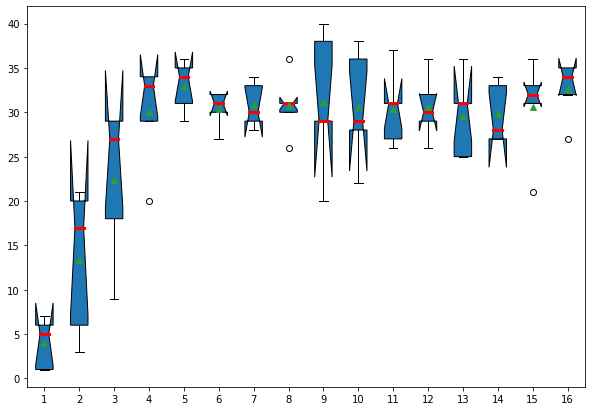

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = [250, 200]
# Creating axes instance
#bp = ax.boxplot(data,showmeans=True)
bp = ax.boxplot(data1, patch_artist = True, notch ='True',showmeans='true')
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
# show plot
plt.show()

## **2 5 DIFFERENT HAMMING DISTANCE**

In [100]:
pt =  "3F5A2F0F0AC0B257"
key = "D3E5B2B0A0C0F57A"
xorPtList=[]
for _ in range(5):
    xorPtList.append(xorN(pt,1))

In [101]:
random5HDs=list(random.choices(range(64),k=5))
random5HDs

[56, 15, 30, 12, 2]

In [102]:
xorPtList=[]

for i in range(5):
    xorPtList.append(xorN(pt,random5HDs[i]))


In [103]:
xorPtList
cList=getList(pt,key) 
cList

Cipher Text :  553C44788CCEB777


['D4841CCB60451FDF',
 '1F3C209CD4841CCB',
 '9B9213B41F3C209C',
 '096A3AA89B9213B4',
 '784BD021096A3AA8',
 '5209B264784BD021',
 '623487F95209B264',
 '2CB40EF5623487F9',
 '21FEF9B82CB40EF5',
 'D46E9D6D21FEF9B8',
 '2B046C12D46E9D6D',
 '2283AA182B046C12',
 'E63F162A2283AA18',
 '3A3ED1F6E63F162A',
 '70CA3AE03A3ED1F6',
 'ADCBF7C170CA3AE0']

In [104]:
x1cL=[]
for i in range(5):
    x1cL.append(getList(xorPtList[i],key))

Cipher Text :  14CB6582E2A7E9F8
Cipher Text :  17C1730CC516E4DC
Cipher Text :  03735A9E9A8569EB
Cipher Text :  BFD3C603E5D1C5D6
Cipher Text :  0013C47DEA09AD41


In [105]:
for i in x1cL:
    print(i)
    print()

['879367567CE138EF', '2159C3E687936756', 'BF1EEEE92159C3E6', 'C04985FBBF1EEEE9', 'B6A9C6EDC04985FB', '65D4BB96B6A9C6ED', '8F5634FA65D4BB96', 'CCCDD2B18F5634FA', '76DA459ACCCDD2B1', 'DAD8457576DA459A', '8D88C388DAD84575', 'C53906D28D88C388', 'E325240EC53906D2', 'EB953448E325240E', 'FAF4C23AEB953448', 'D6812566FAF4C23A']

['B388DE4851055FDE', '3603D6C5B388DE48', 'AA8AF5AA3603D6C5', '9F1F21F0AA8AF5AA', 'E80F99B69F1F21F0', '6AE40A45E80F99B6', '75D7323F6AE40A45', '6F28ADA675D7323F', 'CC6E71466F28ADA6', '97176B26CC6E7146', 'DE790A6B97176B26', '659BCA28DE790A6B', 'FADDE556659BCA28', 'B2025173FADDE556', 'D2448825B2025173', 'D6A5F917D2448825']

['72F03AE0AA6317D6', '946FCEB672F03AE0', 'A0FCBB80946FCEB6', 'A2C0AFD5A0FCBB80', 'D4EB06CDA2C0AFD5', 'C1C190AFD4EB06CD', '8D6BC751C1C190AF', '95970AAD8D6BC751', 'F838CF9795970AAD', '09010C76F838CF97', '95F32FA809010C76', '240C0DD495F32FA8', 'F1B0109D240C0DD4', '35D533A0F1B0109D', 'B8C2DC9F35D533A0', 'C61E28E3B8C2DC9F']

['6CAC348920470FD9', '0FC4C0936CAC

In [106]:
finalList=[] 
# It will contain list of 16 rounds' HD of XORed plaintexts with that of original plaintexts
for i in range(5):
    tempL=[]
    for s1,s2 in zip(cList,x1cL[i]):
        tempL.append(hd(s1,s2))
    print(tempL)
    finalList.append(tempL)
        

[31, 38, 36, 35, 34, 34, 34, 31, 29, 28, 31, 36, 29, 30, 38, 36]
[19, 32, 33, 30, 28, 27, 33, 33, 32, 35, 39, 31, 28, 28, 25, 34]
[25, 32, 33, 35, 35, 30, 31, 29, 30, 37, 40, 37, 33, 35, 34, 35]
[15, 23, 32, 33, 30, 32, 29, 25, 30, 35, 32, 33, 35, 33, 37, 36]
[5, 16, 28, 34, 33, 33, 35, 31, 37, 38, 33, 35, 32, 27, 25, 28]


In [107]:
from itertools import zip_longest
tranposed_tuples = zip_longest(*finalList, fillvalue=None)
transposed_tuples_list = list(tranposed_tuples)
data2 = [list(sublist) for sublist in transposed_tuples_list]
data2

[[31, 19, 25, 15, 5],
 [38, 32, 32, 23, 16],
 [36, 33, 33, 32, 28],
 [35, 30, 35, 33, 34],
 [34, 28, 35, 30, 33],
 [34, 27, 30, 32, 33],
 [34, 33, 31, 29, 35],
 [31, 33, 29, 25, 31],
 [29, 32, 30, 30, 37],
 [28, 35, 37, 35, 38],
 [31, 39, 40, 32, 33],
 [36, 31, 37, 33, 35],
 [29, 28, 33, 35, 32],
 [30, 28, 35, 33, 27],
 [38, 25, 34, 37, 25],
 [36, 34, 35, 36, 28]]

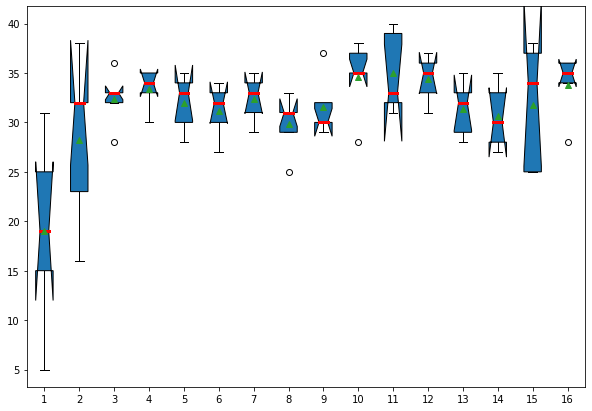

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = [250, 200]
# Creating axes instance
#bp = ax.boxplot(data,showmeans=True)
bp = ax.boxplot(data2, patch_artist = True, notch ='True',showmeans='true')
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
# show plot
plt.show()

## **3. CHANGE KEYS i.e USING 5 DIFFERENT KEYS**

In [109]:
pt =  "3F5A2F0F0AC0B257"
key = "D3E5B2B0A0C0F57A"
xorPtList=[]
for _ in range(5):
    xorPtList.append(xorN(pt,1))

In [110]:
xorKeyList=[]
for _ in range(5):
    xorKeyList.append(xorN(key,1))

In [111]:
xorKeyList

['D3E5B2B0A080F57A',
 'D7E5B2B0A0C0F57A',
 'D3F5B2B0A0C0F57A',
 'D3E532B0A0C0F57A',
 'D3E5B2B0A0C2F57A']

In [112]:
cList=getList(pt,key) 
cList

Cipher Text :  553C44788CCEB777


['D4841CCB60451FDF',
 '1F3C209CD4841CCB',
 '9B9213B41F3C209C',
 '096A3AA89B9213B4',
 '784BD021096A3AA8',
 '5209B264784BD021',
 '623487F95209B264',
 '2CB40EF5623487F9',
 '21FEF9B82CB40EF5',
 'D46E9D6D21FEF9B8',
 '2B046C12D46E9D6D',
 '2283AA182B046C12',
 'E63F162A2283AA18',
 '3A3ED1F6E63F162A',
 '70CA3AE03A3ED1F6',
 'ADCBF7C170CA3AE0']

In [113]:
kCtL=[]
for i in range(5):
    kCtL.append(getList(pt,xorKeyList[i]))

for i in kCtL:
    print(i)
    print()

Cipher Text :  7E4BCA5C39C4D526
Cipher Text :  A599AFD5727593F6
Cipher Text :  DB9C1D40470FD4CE
Cipher Text :  A083D1B278826F59
Cipher Text :  945ECD6161208D36
['94845CCB60451FDF', '1EBCA21E94845CCB', 'EAF476C51EBCA21E', 'AC5261C9EAF476C5', '8630802EAC5261C9', '2D4446AB8630802E', 'F37C8AF62D4446AB', 'FBF981FBF37C8AF6', '15BB24CFFBF981FB', '7D18E63A15BB24CF', '0EF1D0587D18E63A', '7A12C6930EF1D058', '6D8E70CC7A12C693', '2C423E376D8E70CC', '64911F872C423E37', '6F59E95264911F87']

['D4841CCB60451FDF', '173E289CD4841CCB', '5A1E03F6173E289C', '39851DBB5A1E03F6', '24B27C7339851DBB', '281D6DC424B27C73', '8F4EDCC5281D6DC4', '13149A268F4EDCC5', 'CD58E77F13149A26', 'F0A57158CD58E77F', '41465FD2F0A57158', 'E659827841465FD2', 'F6D95688E6598278', '325E4313F6D95688', 'CFB506D4325E4313', 'B8FAAD6FCFB506D4']

['D4841CCB60451FDF', '1D2C209CD4841CCB', '0BD362A81D2C209C', 'AC7970D40BD362A8', '1028A279AC7970D4', '846118961028A279', 'FF190C3084611896', '2659212FFF190C30', '0F09312D2659212F', '36EE2E4E0F0931

In [114]:
finalList=[] 
# It will contain list of 16 rounds' HD of XORed plaintexts with that of original plaintexts
for i in range(5):
    tempL=[]
    for s1,s2 in zip(cList,kCtL[i]):
        tempL.append(hd(s1,s2))
    print(tempL)
    finalList.append(tempL)

from itertools import zip_longest
tranposed_tuples = zip_longest(*finalList, fillvalue=None)
transposed_tuples_list = list(tranposed_tuples)
data3 = [list(sublist) for sublist in transposed_tuples_list]
data3

[2, 8, 22, 31, 34, 41, 34, 30, 36, 38, 37, 31, 31, 35, 33, 29]
[0, 3, 12, 25, 33, 33, 36, 36, 34, 34, 28, 24, 22, 21, 32, 36]
[0, 2, 13, 26, 29, 31, 34, 35, 36, 31, 27, 30, 33, 34, 34, 30]
[2, 12, 25, 30, 32, 30, 32, 36, 33, 33, 33, 35, 32, 28, 33, 37]
[3, 14, 25, 33, 36, 41, 40, 29, 28, 33, 28, 29, 32, 30, 33, 30]


[[2, 0, 0, 2, 3],
 [8, 3, 2, 12, 14],
 [22, 12, 13, 25, 25],
 [31, 25, 26, 30, 33],
 [34, 33, 29, 32, 36],
 [41, 33, 31, 30, 41],
 [34, 36, 34, 32, 40],
 [30, 36, 35, 36, 29],
 [36, 34, 36, 33, 28],
 [38, 34, 31, 33, 33],
 [37, 28, 27, 33, 28],
 [31, 24, 30, 35, 29],
 [31, 22, 33, 32, 32],
 [35, 21, 34, 28, 30],
 [33, 32, 34, 33, 33],
 [29, 36, 30, 37, 30]]

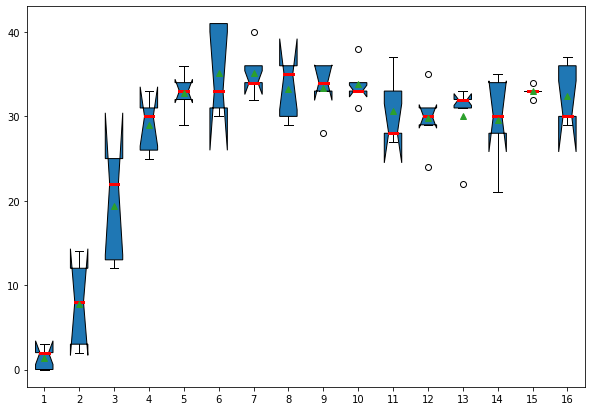

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = [250, 200]
# Creating axes instance
#bp = ax.boxplot(data,showmeans=True)
bp = ax.boxplot(data3, patch_artist = True, notch ='True',showmeans='true')
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
# show plot
plt.show()